In [ ]:
pip install pandas numpy scikit-learn nltk


In [ ]:
from google.colab import files

# Upload files manually
uploaded = files.upload()

# Check if files are uploaded
print("Uploaded Files:", uploaded.keys())


Saving Fake.csv to Fake.csv
Saving True.csv to True.csv
Uploaded Files: dict_keys(['Fake.csv', 'True.csv'])


In [ ]:
import os

print("Files in Current Directory:", os.listdir())

# Check if dataset files exist
if "Fake.csv" in os.listdir() and "True.csv" in os.listdir():
    print("Files found! Proceeding with loading data...")
else:
    print("Dataset files not found! Please upload them again.")


Files in Current Directory: ['.config', 'True.csv', 'Fake.csv', 'sample_data']
Files found! Proceeding with loading data...


In [ ]:
import pandas as pd

df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

print("Dataset Loaded Successfully!")


Dataset Loaded Successfully!


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# Add labels
df_fake["label"] = 1  # Fake news
df_real["label"] = 0  # Real news

# Combine datasets
df = pd.concat([df_fake, df_real], axis=0).reset_index(drop=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop unnecessary columns
df = df[['text', 'label']]

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
None
                                                text  label
0  21st Century Wire says Ben Stein, reputable pr...      1
1  WASHINGTON (Reuters) - U.S. President Donald T...      0
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...      0
3  On Monday, Donald Trump once again embarrassed...      1
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...      0


In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Display cleaned text
print(df['clean_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    st century wire says ben stein reputable profe...
1    washington reuters us president donald trump r...
2    reuters puerto rico governor ricardo rossello ...
3    monday donald trump embarrassed country accide...
4    glasgow scotland reuters us presidential candi...
Name: clean_text, dtype: object


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Initialize the Multinomial Naïve Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 93.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4270
           1       0.94      0.94      0.94      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
def predict_news(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    # Transform text using the trained vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    # Predict using the trained model
    prediction = nb_model.predict(vectorized_text)
    # Return 'Fake' or 'Real'
    return 'Fake' if prediction == 1 else 'Real'

# Example usage
sample_text = "Breaking news: Scientists have discovered a new planet in our solar system."
print(f"Prediction: {predict_news(sample_text)}")


Prediction: Fake


In [ ]:
news_samples = [
    "NASA Announces New Mars Rover Mission for 2026",  # Real
    "Government Bans All Social Media Platforms Starting Tomorrow",  # Fake
    "Apple Unveils New iPhone Model with AI Features",  # Real
    "Scientists Prove the Earth is Flat with New Research",  # Fake
    "WHO Declares Malaria-Free Status for Several Countries",  # Real
    "Elon Musk Announces Free Tesla Cars for Everyone"  # Fake
]

for news in news_samples:
    print(f"News: {news}")
    print(f"Prediction: {predict_news(news)}\n")


News: NASA Announces New Mars Rover Mission for 2026
Prediction: Real

News: Government Bans All Social Media Platforms Starting Tomorrow
Prediction: Real

News: Apple Unveils New iPhone Model with AI Features
Prediction: Fake

News: Scientists Prove the Earth is Flat with New Research
Prediction: Fake

News: WHO Declares Malaria-Free Status for Several Countries
Prediction: Real

News: Elon Musk Announces Free Tesla Cars for Everyone
Prediction: Fake



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 93.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4270
           1       0.94      0.94      0.94      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



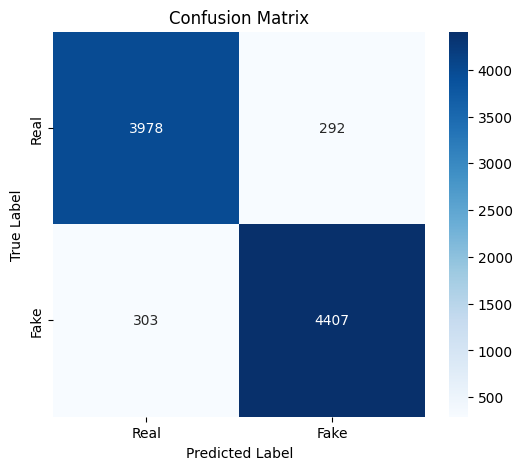

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


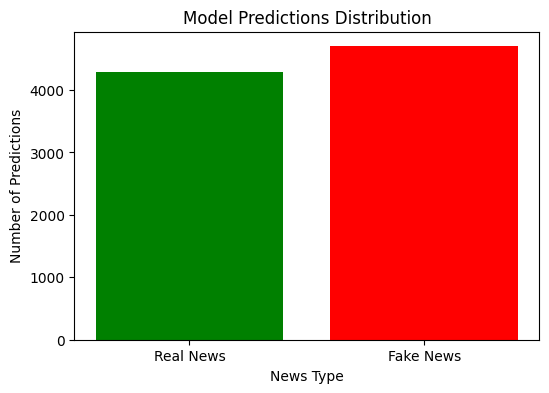

In [ ]:
# Bar Chart of Class Distribution in Predictions
labels = ["Real News", "Fake News"]
pred_counts = [sum(y_pred == 0), sum(y_pred == 1)]

plt.figure(figsize=(6, 4))
plt.bar(labels, pred_counts, color=['green', 'red'])
plt.xlabel("News Type")
plt.ylabel("Number of Predictions")
plt.title("Model Predictions Distribution")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Load datasets (Ensure Fake.csv & True.csv are in your directory)
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# Assign labels: Fake = 1, Real = 0
df_fake["label"] = 1
df_real["label"] = 0

# Combine both datasets
df = pd.concat([df_fake, df_real], axis=0).sample(frac=1).reset_index(drop=True)  # Shuffle

# Select relevant columns
df = df[["text", "label"]]

# Split into train & test sets (80-20 split)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"].values, df["label"].values, test_size=0.2, random_state=42
)

print(f"Dataset loaded! Training samples: {len(train_texts)}, Testing samples: {len(test_texts)}")


Dataset loaded! Training samples: 35918, Testing samples: 8980


In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize & encode dataset
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [34]:
!pip install tensorflow --upgrade
!pip install keras==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.15.0 which is incompatible.


In [1]:
!pip uninstall -y keras tensorflow
!pip install keras==2.15.0 tensorflow==2.15.0


Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled m

In [2]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import tensorflow as tf
from transformers import TFBertForSequenceClassification


In [3]:
# ✅ Ensure TensorFlow uses Keras 2.x
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# ✅ Load BERT Model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# ✅ Use Standard Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)

# ✅ Define Loss Function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# ✅ Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

print("✅ BERT Model Loaded and Compiled Successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ BERT Model Loaded and Compiled Successfully!


In [9]:
import os

print(os.listdir())  # List all files in the current directory


['.config', 'sample_data']


In [10]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload the files


Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [11]:
import os
print(os.listdir())  # Should list Fake.csv and True.csv


['.config', 'True.csv', 'Fake.csv', 'sample_data']


In [13]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")


In [15]:
print(os.listdir())  # Find the exact filename


['.config', 'True.csv', 'Fake.csv', 'sample_data']


In [17]:
fake_df = pd.read_csv("Fake.csv")  # Adjust filename if needed
true_df = pd.read_csv("True.csv")


In [19]:
import pandas as pd

# Load datasets
Fake_df = pd.read_csv("Fake.csv")
True_df = pd.read_csv("True.csv")

# Display first few rows to check if the files loaded correctly
print(Fake_df.head())
print(True_df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [20]:
import os
print(os.listdir())  # List all files in the current directory


['.config', 'True.csv', 'Fake.csv', 'sample_data']


In [21]:
print(Fake_df.info())
print(True_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [22]:
Fake_df['label'] = 0  # 0 for Fake news
True_df['label'] = 1  # 1 for True news

# Combine both datasets
data = pd.concat([Fake_df, True_df], axis=0).reset_index(drop=True)

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

print(data.head())  # Display sample data


                                               title  \
0  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   
1  Mexico ruling party hopeful attacks rival's 'h...   
2  LEGAL IMMIGRATION OF MUSLIMS INVITED TO U.S. T...   
3   Read President Obama’s Moving Proclamation De...   
4  FULL-FRONTAL ASSAULT ON CENSORSHIP: CANADA’S P...   

                                                text          subject  \
0  There has never been a more UNCOURAGEOUS perso...         politics   
1  MEXICO CITY (Reuters) - A newly unveiled presi...        worldnews   
2  Of course they have no plans to assimilate The...  Government News   
3  Every year President Obama  declares  June LGB...             News   
4  The death of free speech seems to be catching ...        left-news   

                 date  label  
0         May 8, 2017      0  
1  November 29, 2017       1  
2        Jul 17, 2015      0  
3        June 1, 2016      0  
4        Jun 29, 2016      0  


In [23]:
print(data.isnull().sum())  # Check if any missing values exist


title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [24]:
data.dropna(inplace=True)


In [25]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing the text column
tokens = tokenizer(
    list(data['text']),  # Assuming the news content is in the "text" column
    max_length=512,  # Truncate to 512 tokens (BERT limit)
    padding='max_length',  # Pad shorter texts
    truncation=True,
    return_tensors="tf"
)

# Check tokenized output
print(tokens.keys())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [26]:
import tensorflow as tf

labels = tf.convert_to_tensor(data['label'].values)  # Convert labels to tensor


In [28]:
import numpy as np

# Convert tokenized text to NumPy arrays
input_ids = np.array(tokens['input_ids'])
attention_masks = np.array(tokens['attention_mask'])
labels = np.array(labels)  # Convert labels tensor to NumPy array

# Now split the data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)

# Convert back to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(16)
val_dataset = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(16)


In [2]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model with an optimizer, loss function, and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

print("✅ Model initialized and compiled successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model initialized and compiled successfully!


In [5]:
import pandas as pd

# Load the datasets
Fake_df = pd.read_csv("Fake.csv")
True_df = pd.read_csv("True.csv")

# Add labels (0 for Fake News, 1 for True News)
Fake_df["label"] = 0
True_df["label"] = 1

# Combine both datasets
df = pd.concat([Fake_df, True_df], axis=0).reset_index(drop=True)

# Shuffle the dataset to mix Fake and True news properly
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Dataset loaded successfully!")
print(df.head())  # Show first few rows


✅ Dataset loaded successfully!
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  


In [6]:
print(df.columns)


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert tokenized inputs to NumPy arrays
input_ids = np.array(tokens["input_ids"])  # Convert to NumPy
attention_masks = np.array(tokens["attention_mask"])  # Convert to NumPy
labels = np.array(labels)  # Convert labels to NumPy

# Split into training and validation sets
train_input_ids, val_input_ids, train_labels, val_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)

train_attention_masks, val_attention_masks, _, _ = train_test_split(
    attention_masks, labels, test_size=0.2, random_state=42
)

print("✅ Data split successfully!")


✅ Data split successfully!


In [10]:
import tensorflow as tf

# Convert into TensorFlow Dataset (including attention masks)
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": train_input_ids, "attention_mask": train_attention_masks},
    train_labels
)).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": val_input_ids, "attention_mask": val_attention_masks},
    val_labels
)).batch(16)

print("✅ Training and validation datasets are ready!")


✅ Training and validation datasets are ready!


In [2]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

# Load pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

print("✅ Model loaded and compiled successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded and compiled successfully!


In [5]:
import pandas as pd

# Load datasets
Fake_df = pd.read_csv("Fake.csv")
True_df = pd.read_csv("True.csv")

# Add labels: 0 for Fake news, 1 for True news
Fake_df["label"] = 0
True_df["label"] = 1

# Combine both datasets
df = pd.concat([Fake_df, True_df], axis=0)

# Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

# Extract text and labels
texts = df["text"].tolist()  # Extracting text data
labels = df["label"].tolist()  # Extracting labels


In [6]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets (80% train, 20% validation)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)


In [7]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512, return_tensors="tf")
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512, return_tensors="tf")


In [8]:
import tensorflow as tf

# Convert encodings and labels into TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings), train_labels
)).batch(16)  # Adjust batch size as needed

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings), val_labels
)).batch(16)


In [2]:
!pip install scikit-learn nltk pandas


In [3]:
import pandas as pd

# Load datasets
Fake_df = pd.read_csv("Fake.csv")
True_df = pd.read_csv("True.csv")

# Add labels (0 for Fake, 1 for True)
Fake_df["label"] = 0
True_df["label"] = 1

# Merge datasets
df = pd.concat([Fake_df, True_df], axis=0).sample(frac=1).reset_index(drop=True)

# Extract text and labels
texts = df["text"].tolist()
labels = df["label"].tolist()


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct way to initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Convert text into TF-IDF vectors
X = vectorizer.fit_transform(texts)


In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'labels' is a list or array containing 0 (Fake) and 1 (Real) labels
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (35918, 5000)
Testing data shape: (8980, 5000)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9869710467706013


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4736
           1       0.98      0.99      0.99      4244

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4660   76]
 [  41 4203]]


In [9]:
import joblib

# Save the trained model
joblib.dump(model, "fake_news_model.pkl")

print("Model saved as fake_news_model.pkl")


Model saved as fake_news_model.pkl


In [10]:
# Load the saved model
loaded_model = joblib.load("fake_news_model.pkl")

# Example input text
new_texts = ["Breaking news! A major event has just happened.", "Government officials have denied the claim."]

# Convert text to TF-IDF
new_X = vectorizer.transform(new_texts)

# Make predictions
predictions = loaded_model.predict(new_X)

print("Predictions:", predictions)  # 0 = Fake, 1 = Real


Predictions: [0 0]


In [11]:
import joblib

# Save the trained model
joblib.dump(model, "fake_news_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [12]:
# Load the trained model and vectorizer
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")


In [13]:
# Example test news articles
test_news = [
    "Breaking: Government announces new policy changes to improve education standards.",
    "Scientists discover a new planet made entirely of diamonds in our solar system!"
]

# Convert text to feature vectors
test_vectors = vectorizer.transform(test_news)

# Make predictions
predictions = model.predict(test_vectors)

# Display results
for i, news in enumerate(test_news):
    print(f"News: {news}")
    print(f"Prediction: {'Fake' if predictions[i] == 0 else 'Real'}\n")


News: Breaking: Government announces new policy changes to improve education standards.
Prediction: Fake

News: Scientists discover a new planet made entirely of diamonds in our solar system!
Prediction: Fake



In [15]:
while True:
    user_input = input("Enter a news headline (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        break
    test_vector = vectorizer.transform([user_input])
    prediction = model.predict(test_vector)[0]
    print("Prediction:", "Fake" if prediction == 0 else "Real")


Enter a news headline (or type 'exit' to quit): If US wants war, we're ready to fight': China's big message to Donald Trump amid tariff tensions
Prediction: Fake
Enter a news headline (or type 'exit' to quit): Elon Musk is a robot
Prediction: Fake
Enter a news headline (or type 'exit' to quit): There would be no Nuclear war in future
Prediction: Fake
Enter a news headline (or type 'exit' to quit): exit


In [27]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [[-0.56914833  0.20714064  0.20897164 ...  0.26679994  0.6656813
   1.58136784]]
Intercept: [-2.23034542]


In [28]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9870


In [29]:
y_pred = model.predict(X_test)


In [30]:
sample_text = ["NASA confirms water ice on the Moon's surface!"]
sample_vectorized = vectorizer.transform(sample_text)  # Convert text to TF-IDF
prediction = model.predict(sample_vectorized)
print("Prediction:", "Fake News" if prediction[0] == 0 else "Real News")


Prediction: Fake News


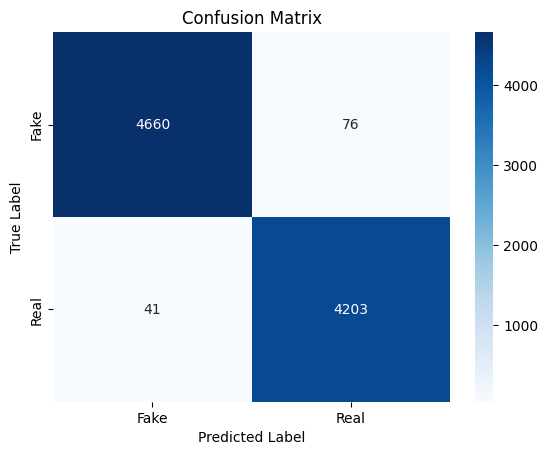

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4736
           1       0.98      0.99      0.99      4244

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



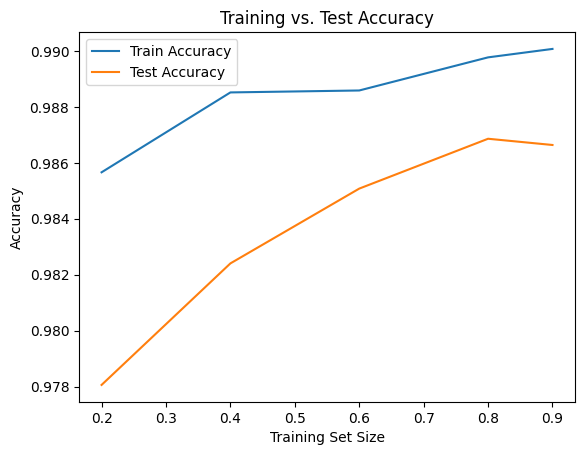

In [34]:
train_sizes = [0.2, 0.4, 0.6, 0.8, 0.9]  # Removed 1.0
train_scores = []
test_scores = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model.fit(X_train_sub, y_train_sub)
    train_scores.append(model.score(X_train_sub, y_train_sub))
    test_scores.append(model.score(X_test, y_test))

plt.plot(train_sizes, train_scores, label="Train Accuracy")
plt.plot(train_sizes, test_scores, label="Test Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy")
plt.legend()
plt.show()


In [35]:
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9866


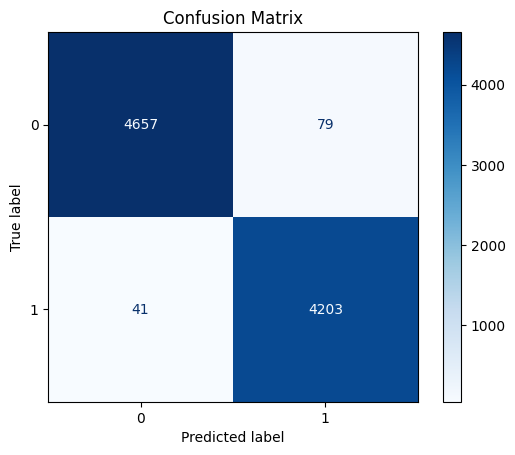

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4736
           1       0.98      0.99      0.99      4244

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



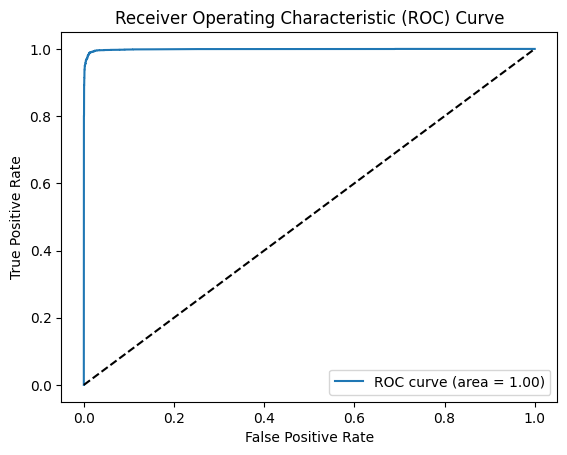

In [38]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


In [39]:
import joblib

# Save model
joblib.dump(model, "fake_news_model.pkl")

# Load model
loaded_model = joblib.load("fake_news_model.pkl")

# Test loaded model
test_accuracy = loaded_model.score(X_test, y_test)
print(f"Loaded Model Test Accuracy: {test_accuracy:.4f}")


Loaded Model Test Accuracy: 0.9866


In [40]:
new_texts = ["This is breaking news about politics!", "COVID-19 vaccine is fake."]
new_texts_tfidf = vectorizer.transform(new_texts)
predictions = model.predict(new_texts_tfidf)

for text, pred in zip(new_texts, predictions):
    label = "Real" if pred == 1 else "Fake"
    print(f"Text: {text} --> Prediction: {label}")


Text: This is breaking news about politics! --> Prediction: Fake
Text: COVID-19 vaccine is fake. --> Prediction: Fake
